In this blog I will try to clarify precision, recall, and threshold concepts in classification problems. I will present different scenarios to show the importance of precision/recall, and weakness of accuracy at some cases. I also aim to provide some insight into how threshold can affect the models performance and effectiveness. I assume the reader has some knowledge about the subject and will not start from the ground-zero. I will try to visualize the concept, provide a well-demonstrated example, show way to improve the effectiveness of model and present the formulation and try to keep these simple.

<img src="https://cdn.pixabay.com/photo/2016/05/23/15/41/aircraft-1410627_960_720.jpg" />

It is important to understand metrics to evaluate our model. Even tough accuracy is a well-known metric for evaluation of a classifier, in some cases, especially if data is imbalanced, or there are some cost associated with predicting one class better than the other, we will be required to use other metrics. 

Most of the time it is thought that precision, recall are metrics to evaluate different classifiers. Additionally, we can use those metrics along with the decision threshold concept to improve our model's performance according to our needs. 

In an ML/DL problem after doing immense calculation, coding in the background, evaluating performance and sometimes explaining your boss the results may be quite tricky. It is important to understand users' needs and tailor the model according to those needs. 

Lets see some example scenarios to understand recall and precision.

Scenario 1:  
Imagine you are working on a classification problem trying to find disease + patients. There is a treatment for disease+ patients but it has some serious side effects and also very expensive to apply to patients. So your boss would want to be sure that, when your model says it is a disease+, it should be (almost) surely a positive. There is no tolerance to get a disease- as disease+, however he/she agrees to miss some disease+ patients and not to apply treatment.

Scenario 2:  
Similar to that one, you are working on a classifier that classifies fighter aircraft in the air as hostile or friendly. If it is a hostile then the target would be destroyed. So you wouldn't want to destroy a friendly target by misclassifying it. In this scenario, there is no tolerance to label a friendly aircraft as a hostile aircraft.

In above two cases, when your models claim that the sample as a target, you would want to be quite sure that it is a hostile aircraft. (But, eventually you might be agree that you can miss some targets) 

But in some other scenarios, your interest might be different. 

Scenario 3:  
Let's say, you are working for an insurance company and designing a health care system trying to detect a certain disease in an early phase of illness based on some measurements and then apply further examinations based on this prediction to avoid some future undesired situations. Let's assume the cost of further examinination is cheap and easy to apply. So, in this model, you would want to keep as many positives as possible in your output. Your model's predictions must cover almost all possible positives and you wouldn't want to miss a positive. (Yes, if it is that much cheap to apply a treatment why not aplly to all?) 

Scenario 4:  
Similarly in a surveillance system you would like to detect every possible intrusion without any exception and take some further actions to identify if it is a real threat or not, maybe employing a human to check every positive detection by your model.

So what is going on in technical terms:

Scenario 1 & 2:  
In those scenarios, I am looking or a high precision. Which means, when my model claims it as POSITIVE, I expect it with a high percentage that it is a POSITIVE. 
In other words, I don't want to see (almost) any  NEGATIVEs in my POSITIVEly classified samples.

In math terms, the ratio of the number of TRUEly classified POSITIVEs to the number of targets classified as POSITIVE is called precision and it should be as high as possible. 

So, what is said above can be formulated as: (I intentionally left some words as uppercase since they refer to confusion matrix elements.)

precision = (the number of TRUEly classified samples as POSITIVE)/(the number of TRUEly and FALSEly classified samples as POSITIVE)

The ratio of TRUEly classified POSITIVEs to the entire POSITIVEs should be as high as possible. 

In plain English, when the model says it is POSTITIVE, I should be able to trust it!!!

Scenario 3 & 4:  
In those scenarios, I am looking for a high recall rate. Which means, I want my model not to miss any POSITIVEs.  

Recall is more simple, out of total POSITIVEs, how many of them are classified TRUEly as POSITIVE.

In math terms, the ratio of the number of TRUEly classified samples as POSITIVE to the total number of POSITIVEs in the sample set.

recall = (the number of TRUEly classified samples as POSITIVE) / ((the number of TRUEly classified samples as POSITIVE)+(the number of FALSEly classified samples as NEGATIVE - in fact POSITIVE)(so all POSITIVEs))

Here is the confusion matrix showing all TRUE/FALSE POSITIVE/NEGATIVE cells for calculations.

<img src="https://github.com/aslanismailgit/medium/blob/master/conf%20mat.001.png"/>

In [2]:
<img src="https:github.com\aslanismailgit\medium\blob\master\conf%20mat.001.png" />

SyntaxError: invalid syntax (<ipython-input-2-15ceb86b4bcd>, line 1)

Threshold is an important concept related to precision and recall. That is a parameter that changes the values of both metrics. Also allows us to adjust our model according to our priorities, as described in above scenarios.  
The basic idea behind threshold concept is that the model gives a score (or probability) for each sample, if that score is greater than a threshold, that sample is assigned to the positive class, if less than that value the sample is aggigned to the negative class. So in fact, the threshold determines which sample goes to which class. 

Let's see how threshold affects precision, recall in a scenario. I pick the second scenario.  

Let's assume that there are 20 aircraft in the air 10/10 hostile and friendly. Reds are hostile and blues are friendly. I collected the data, made some data-preparation and trained the model as binary classifier. My model gives a score for each sample, and by comparing this score to a "threshold" value, it is determined whether it is a positive (hostile) or negative (friendly). For simplicity, the model scores are shown in the dimension of an aircraft. That means if the score is higher for that sample then it is shown in the exhibit bigger in size. From right to left I change threshold and will see how the precision and recall will be affected. 
The two tables below show the true labels and predicted classes based on the scores and threshold. 
The plot in the right-bottom shows the change of precision and recall at each level of threshold.
As you will notice, while moving the threshold to the left precision gets lower, recall increases, and accuracy remains the same. It is a good example that accuracy is not changing while precision and recall shows fluctuations.

As  an example the results in plain English can be stated as:

Threshold 1:    
PRECISION : Model's positive claims are 100% correct     
RECALL    : Model correctly predicts 30% of total positives   
ACCURACY  : Model's accuracy is 65%  

Threshold 2:  
PRECISION : Model's positive claims are 80% correct   
RECALL : Model correctly predicts 40% of total positives   
ACCURACY : Model's accuracy is 65%  

Here is the code that calculates the metrics and also generates the plot.

It is also a good practice to plot precision vs recall and see the trade-off and make a decision.

Caveats:
- Unfortunately, you can’t have it both ways: increasing precision reduces recall, and vice versa. This is called the precision/recall trade-off.
- This demonstration is done for a binary classification problem, but can be extended to a multiclass problems.
- Precision, recall is also good metrics to evaluate different classifiers.
- F1 is not mentioned, which gives similar weights to precision and recall.

Question to think about:  
Regarding the hostile aircraft detection problem, how would you change your threshold if the inspected target is getting closer to your border? Would you think about different thresholds for different situations?  
  
Keep in mind:  
Fine-tuning and presentation are important steps of your analysis.

The purpose of this article was to demostrate precision, recall and the effect of threshold on the performance of a model.  
  
I hope it helps. And if you are happy to read, please clap along :)

In [1]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_score, accuracy_score, recall_score

In [2]:
def calc_metrics(label,preds):
    precision = precision_score(label,preds)
    recall = recall_score(label,preds)
    accuracy = accuracy_score(label,preds)

    print("PRECISION :\n""Model's positive claims are {:2.0f}% correct ".format(100*precision))
    print("RECALL :\n""Model correctly predicts {:2.0f}% of total positives ".format(100*recall))
    print("ACCURACY :\n""Model's accuracy is {:2.0f}%".format(100*accuracy))
    return precision,recall,accuracy

In [3]:
def plot_metrics(pr,rec,acc,plotname):
    plt.plot(pr,"bx-",label="Precision")
    plt.plot(rec,"ro-",label="Recall")
    plt.plot(acc,"g.-",label="Accuracy")
    plt.axis([-0.25, 7.25, 0.25, 1.05])
    plt.ylabel("Metrics")
    plt.xlabel("Thresholds")
    plt.legend()
    plt.savefig(plotname,dpi=320)
    plt.show()

In [4]:
label_0 = [0,0,0,0,0,0,0,0,0,0]
label_1 = [1,1,1,1,1,1,1,1,1,1]
label = np.append(label_0,label_1)

PRECISION :
Model's positive claims are 100% correct 
RECALL :
Model correctly predicts 30% of total positives 
ACCURACY :
Model's accuracy is 65%


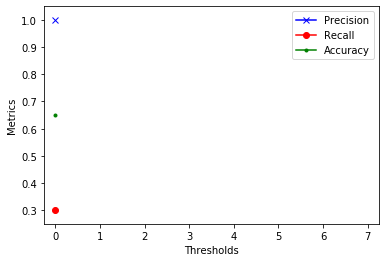

PRECISION :
Model's positive claims are 80% correct 
RECALL :
Model correctly predicts 40% of total positives 
ACCURACY :
Model's accuracy is 65%


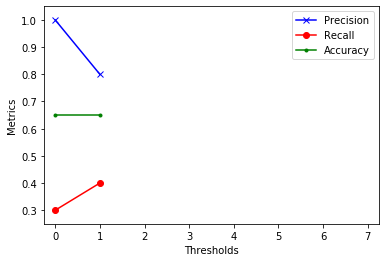

PRECISION :
Model's positive claims are 71% correct 
RECALL :
Model correctly predicts 50% of total positives 
ACCURACY :
Model's accuracy is 65%


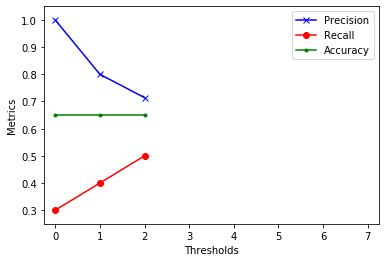

PRECISION :
Model's positive claims are 67% correct 
RECALL :
Model correctly predicts 60% of total positives 
ACCURACY :
Model's accuracy is 65%


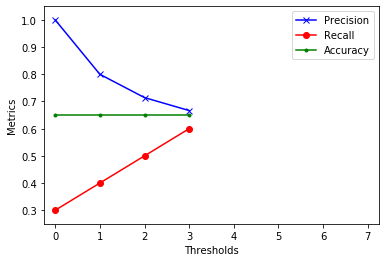

PRECISION :
Model's positive claims are 64% correct 
RECALL :
Model correctly predicts 70% of total positives 
ACCURACY :
Model's accuracy is 65%


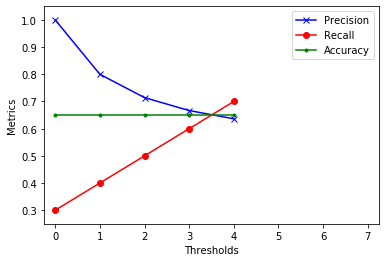

PRECISION :
Model's positive claims are 62% correct 
RECALL :
Model correctly predicts 80% of total positives 
ACCURACY :
Model's accuracy is 65%


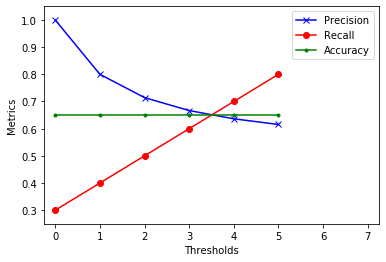

PRECISION :
Model's positive claims are 60% correct 
RECALL :
Model correctly predicts 90% of total positives 
ACCURACY :
Model's accuracy is 65%


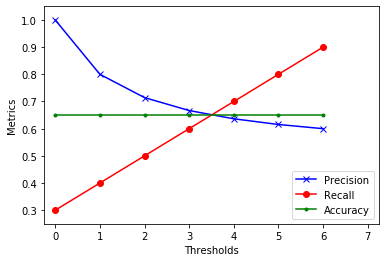

PRECISION :
Model's positive claims are 59% correct 
RECALL :
Model correctly predicts 100% of total positives 
ACCURACY :
Model's accuracy is 65%


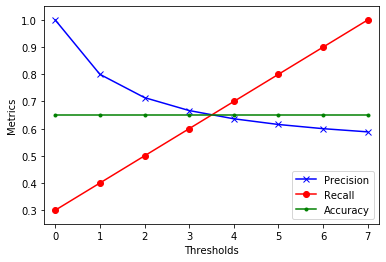

In [5]:
pr = []
rec = []
acc = []

pred_0  = [0,0,0,0,0,0,0,0,0,0] # blues
pred_1 = [1,1,1,0,0,0,0,0,0,0]  # reds
preds_treshold_1 = np.append(pred_0,pred_1)
precision,recall,accuracy = calc_metrics(label,preds_treshold_1)
pr.append(precision),rec.append(recall),acc.append(accuracy)
plot_metrics(pr,rec,acc,"threshold_1")

pred_0  = [1,0,0,0,0,0,0,0,0,0] # blues
pred_1 = [1,1,1,1,0,0,0,0,0,0]  # reds
preds_treshold_2 = np.append(pred_0,pred_1)
precision,recall,accuracy = calc_metrics(label,preds_treshold_2)
pr.append(precision),rec.append(recall),acc.append(accuracy)
plot_metrics(pr,rec,acc,"threshold_2")

pred_0  = [1,1,0,0,0,0,0,0,0,0] # blues
pred_1 = [1,1,1,1,1,0,0,0,0,0]  # reds
preds_treshold_3 = np.append(pred_0,pred_1)
precision,recall,accuracy = calc_metrics(label,preds_treshold_3)
pr.append(precision),rec.append(recall),acc.append(accuracy)
plot_metrics(pr,rec,acc,"threshold_3")

pred_0  = [1,1,1,0,0,0,0,0,0,0] # blues
pred_1 = [1,1,1,1,1,1,0,0,0,0]  # reds
preds_treshold_4 = np.append(pred_0,pred_1)
precision,recall,accuracy = calc_metrics(label,preds_treshold_4)
pr.append(precision),rec.append(recall),acc.append(accuracy)
plot_metrics(pr,rec,acc,"threshold_4")

pred_0  = [1,1,1,1,0,0,0,0,0,0] # blues
pred_1 = [1,1,1,1,1,1,1,0,0,0]  # reds
preds_treshold_5 = np.append(pred_0,pred_1)
precision,recall,accuracy = calc_metrics(label,preds_treshold_5)
pr.append(precision),rec.append(recall),acc.append(accuracy)
plot_metrics(pr,rec,acc,"threshold_5")

pred_0  = [1,1,1,1,1,0,0,0,0,0] # blues
pred_1 = [1,1,1,1,1,1,1,1,0,0]  # reds
preds_treshold_6 = np.append(pred_0,pred_1)
precision,recall,accuracy = calc_metrics(label,preds_treshold_6)
pr.append(precision),rec.append(recall),acc.append(accuracy)
plot_metrics(pr,rec,acc,"threshold_6")

pred_0  = [1,1,1,1,1,1,0,0,0,0] # blues
pred_1 = [1,1,1,1,1,1,1,1,1,0]  # reds
preds_treshold_7 = np.append(pred_0,pred_1)
precision,recall,accuracy = calc_metrics(label,preds_treshold_7)
pr.append(precision),rec.append(recall),acc.append(accuracy)
plot_metrics(pr,rec,acc,"threshold_7")

pred_0  = [1,1,1,1,1,1,1,0,0,0] # blues
pred_1 = [1,1,1,1,1,1,1,1,1,1]  # reds
preds_treshold_8 = np.append(pred_0,pred_1)
precision,recall,accuracy = calc_metrics(label,preds_treshold_8)
pr.append(precision),rec.append(recall),acc.append(accuracy)
plot_metrics(pr,rec,acc,"threshold_8")

1


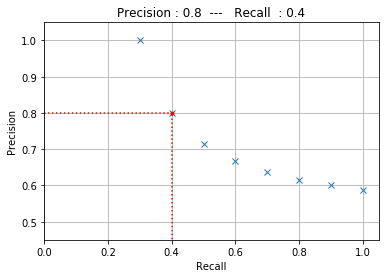

In [6]:
plt.plot(rec,pr,"x")
p = np.argmax((np.array(pr)>=0.75) & (np.array(pr)<=0.85))
print(p)
plt.plot(rec[p],pr[p],"r.")

plt.plot([rec[p], rec[p]], [0., pr[p]], "r:")
plt.plot([0.0, rec[p]], [pr[p], pr[p]], "r:")
plt.axis([0, 1.05, 0.45, 1.05])

plt.grid(True)
plt.ylabel("Precision")
plt.xlabel("Recall")
title = "Precision : " + str(np.round(pr[p],2)) + "  ---   Recall  : " + str(np.round(rec[p],2))
plt.title(title)
plt.savefig("Trade-off",dpi=320)
plt.show()